# Importing Tools:

In [1]:
# Directory Tools:
import os
# Asthetic Tools:
from IPython.display import display # Print tables with better formatting (> print)
import warnings
# Data Exploration Tools:
import pandas as pd
import numpy as np
# Data Visualization Tools:
import matplotlib.pyplot as plt
import seaborn as sns
# Statistics tools:
from scipy.stats import ttest_ind
# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randint
from scipy.stats import uniform as sp_rand
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#import parfit.parfit as pf

In [2]:
# Home PC
#os.chdir('C:/Users/jdavo/OneDrive/Documents/Datasets/quality-prediction-in-a-mining-process')
# os.listdir('/home/javarrm') # Files in directory
os.getcwd()
data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=",")

In [3]:
# Viewing Data Information
print('Column Names')
display(data.columns)
print('Top 5')
display(data.head())
print('Bottom 5')
display(data.tail())
print('Data Information')
display(data.describe(include='all'))
display(data.info())

Column Names


Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

Top 5


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


Bottom 5


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
737448,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
737452,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71


Data Information


,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,737453,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,...,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000,737453.000000
unique,4097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-08-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,56.294739,14.651716,2869.140569,488.144697,397.578372,9.767639,1.680380,280.151856,277.159965,...,290.754856,520.244823,522.649555,531.352662,420.320973,425.251706,429.941018,421.021231,65.050068,2.326763
std,NaN,5.157744,6.807439,1215.203734,91.230534,9.699785,0.387007,0.069249,29.621288,30.149357,...,28.670105,131.014924,128.165050,150.842164,91.794432,84.535822,89.862225,84.891491,1.118645,1.125554
min,NaN,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.991000,155.841000,175.349000,62.050000,0.600000
25%,NaN,52.670000,8.940000,2076.320000,431.796000,394.264000,9.527360,1.647310,250.281000,250.457000,...,256.302000,416.978000,441.883000,411.325000,356.679000,357.653000,358.497000,356.772000,64.370000,1.440000
50%,NaN,56.080000,13.850000,3018.430000,504.393000,399.249000,9.798100,1.697600,299.344000,296.223000,...,299.011000,491.878000,495.956000,494.318000,411.974000,408.773000,424.664575,411.065000,65.210000,2.000000
75%,NaN,59.720000,19.600000,3727.730000,553.257000,402.968000,10.038000,1.728330,300.149000,300.690000,...,301.904000,594.114000,595.464000,601.249000,485.549000,484.329000,492.684000,476.465000,65.860000,3.010000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null object
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non-null fl

None

In [4]:
# Number of Unique Values
for i in list(data.columns):
    print("{}: {}".format(i, len(data.loc[:, i].unique())))

date: 4097
% Iron Feed: 278
% Silica Feed: 293
Starch Flow: 409317
Amina Flow: 319416
Ore Pulp Flow: 180189
Ore Pulp pH: 131143
Ore Pulp Density: 105805
Flotation Column 01 Air Flow: 43675
Flotation Column 02 Air Flow: 80442
Flotation Column 03 Air Flow: 40630
Flotation Column 04 Air Flow: 196006
Flotation Column 05 Air Flow: 194711
Flotation Column 06 Air Flow: 90548
Flotation Column 07 Air Flow: 86819
Flotation Column 01 Level: 299573
Flotation Column 02 Level: 331189
Flotation Column 03 Level: 322315
Flotation Column 04 Level: 309264
Flotation Column 05 Level: 276051
Flotation Column 06 Level: 301502
Flotation Column 07 Level: 295667
% Iron Concentrate: 38696
% Silica Concentrate: 55569


In [4]:
for i in data.columns.drop('date'):
    data[i].astype(float)
data.set_index(data['date'], inplace=True)
date = data.pop('date')
data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


# Questions
- Is there a correlation between the Iron and Silican feed percentages? (Time Series Graph)
- What is the relationship bewteen date and the Iron and Silican concentrates? (Scatter Plot, Iron and silican values)


# Scatterplot

# Time Series

In [6]:

sns.tsplot(data['% Silica Concentrate'])
plt.show()

/home/javarrm/.conda/envs/myenv/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


MemoryError: 

In [6]:
major_corrs = ['% Iron Concentrate', '% Silica Concentrate']
corr = abs(data.corr(method='pearson').reindex(major_corrs))
abs(corr.reindex(major_corrs) )

NameError: name 'model_data' is not defined

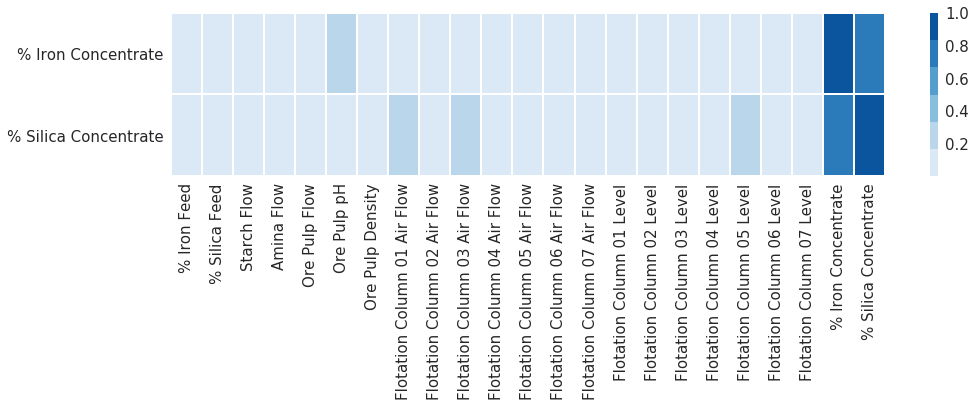

In [14]:
plt.figure(figsize = (16, 3))
cmap = sns.color_palette("Blues") 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=major_corrs,
           cmap=cmap,
           linewidth=1, linecolor='white')
sns.set(font_scale = 1.5)
plt.show()

__Note: I took the absolute value of the correlations since our goal is to find out which ones correlate the most and have the most significance to our prediction variables.__

Correlation for the % Silica Concentrate Values comes from 'Flotation Coloumn 01 Air Flow', 'Flotation Coloumn 03 Air Flow', and 'Flotation Coloumn 06 Level'.

Correlation for the % Iron Concentration Values comes from the 'Ore Pulp ph'.

I left out the high correlation between the % Iron Concentrate and % Silica Concentrate because ideally we'd like to predict both to reduce as much time as possible, while the engineers/scientist are conducting measurements manually.

In the case our ML models don't show give us the results we need, we can decide on whether or not to predict % Silica Concentrate or % Iron Concentrate.
- The prediction variable would ultimately be the one that gives us the highest accuracy, and reduces the most amount of time in the measurement process.

# Correlation Visuals
__Below are the graphical representations of the highest correlations discussed above using pearsons.__

## % Silica Concentration and % Iron Concentration:

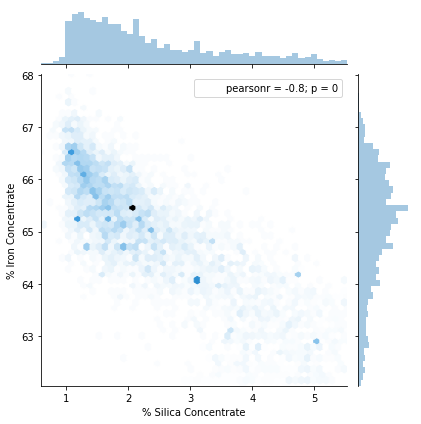

In [31]:
warnings.simplefilter('ignore')
sns.jointplot(x="% Silica Concentrate", y="% Iron Concentrate", data=model_data, kind="hex")
plt.show()
warnings.simplefilter('default')

## Relationships with % Silica Concentrate
- One of the prediction variables is the % of Silica Concentrate and below are the features that showed the highest correlation with % Silica Concentrate

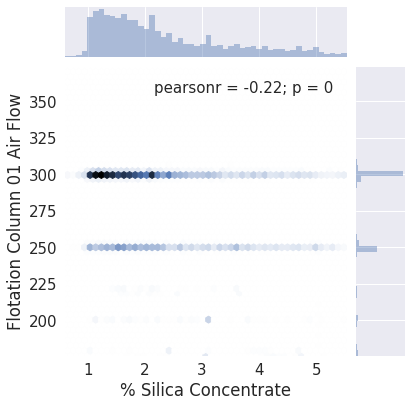

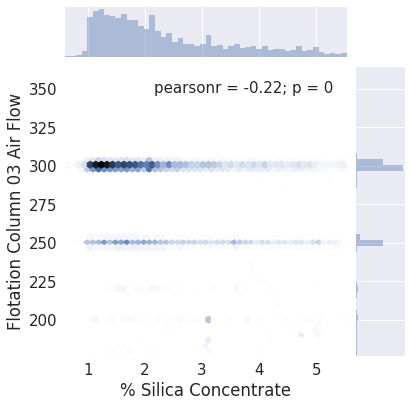

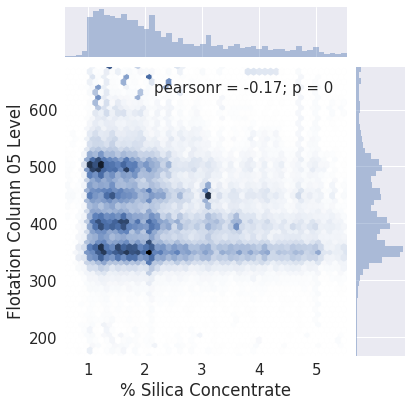

In [17]:
warnings.simplefilter('ignore')
sns.jointplot(x="% Silica Concentrate", y="Flotation Column 01 Air Flow", data=model_data, kind="hex")
sns.jointplot(x="% Silica Concentrate", y="Flotation Column 03 Air Flow", data=model_data, kind="hex")
sns.jointplot(x="% Silica Concentrate", y="Flotation Column 05 Level", data=model_data, kind="hex")
#print('This feature may have a higher correlation than the other models but it doesn\'t visually represent a higher correlation.')
plt.show()
warnings.simplefilter('default')

# Distribution of the Prediction Variables:
- (Left)  "% Iron Concentrate"
- (Right) "% Silica Concentrate"

In [9]:
sns.set_style('white')
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(1,2,1)
ax1 = sns.boxplot(data = model_data['% Iron Concentrate'], color='gray').set_title('% Iron Concentrate Distribution')
plt.subplot(1,2,2)
ax2 = sns.boxplot(data = model_data['% Silica Concentrate'], color='turquoise').set_title('% Silica Concentrate Distribution')
plt.show()

IndexError: 0

In [12]:
display(model_data.columns)

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [14]:
s_test = ['% Silica Concentrate']
si_test = ['% Silica Concentrate', '% Iron Concentrate']
X_train, X_test, y_train, y_test = train_test_split(model_data.drop(s_test), model_data[s_test],\
                                                    test_size=0.30, random_state=53)
X_train_wi, X_test_wi, y_train_wi, y_test_wi = train_test_split(model_data.drop(si_test), model_data[si_test],\
                                                    test_size=0.30, random_state=53)
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
kv = KFold(n_splits=10, random_state=42)

## Setting up for PCA

## Linear Regression

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

scores = cross_val_score(regressor, X_test, y_test, cv=cv, n_jobs=-1)
pred = regressor.predict(X_test)
print("Average Score = {0:.2f}%" .format(scores.mean()*100))
#print("Feature Importance: {}".format(regressor.feature_importances_))
#print("Single prediction = {0:.2f}%".format(metrics.accuracy_score(y_test, pred)*100))

regressor.fit(X_train_wi, y_train_wi)
scores = cross_val_score(regressor, X_test_wi, y_test_wi, cv=cv, n_jobs=-1)
pred = regressor.predict(X_test_wi)
print("Average Score = {0:.2f}%" .format(scores.mean()*100))

Average Score = 100.00%
Average Score = 100.00%


In [ ]:
regressor.fit(X_train_pca, y_train)
scores = cross_val_score(regressor, X_test_pca, y_test, cv=cv, n_jobs=-1)
pred = regressor.predict(X_test_pca)
print("Average Score = {0:.2f}%" .format(scores.mean()*100))

regressor.fit(X_train_pca_wi, y_train_wi)
scores = cross_val_score(regressor, X_test_pca_wi, y_test_wi, cv=cv, n_jobs=-1)
pred = regressor.predict(X_test_pca_wi)
print("Average Score = {0:.2f}%" .format(scores.mean()*100))

In [20]:
paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
})

best_model, best_score, all_models, all_scores = pf.bestFit(regressor, paramGrid, 
     X_train, y_train, X_val, y_val, 
     metric=roc_auc_score, bestScore='max', scoreLabel='AUC')
print(best_model)

NameError: name 'ParameterGrid' is not defined

In [15]:
regressor = RandomForestRegressor()
regressor.fit(X_train_wi, y_train_wi)

param_grid = {'criterion': ['mse', 'mae'],
              'max_features': sp_rand(),
              'max_depth': sp_randint(),
              'min_samples_leaf': sp_rand(0, .5),
              'min_samples_split': sp_rand(),
              #'max_leaf_nodes': sp_randint(),
              'min_weight_fraction_leaf': sp_rand(0, .5),
              'min_impurity_decrease': sp_rand(),
              'n_jobs': [-1],
              'random_state':[42]
             }
# create and fit a ridge regression model, testing random alpha values
rsearch = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=5)
rsearch.fit(X_train_wi, y_train_wi)
print(rsearch)

KeyboardInterrupt: 

In [ ]:
pred = rsearch.predict(X_test_wi)
print(metrics.mean_absolute_error(y_test_wi, pred))
print(metrics.mean_squared_error(y_test_wi, pred))
print(np.sqrt(metrics.mean_squared_error(y_test_wi, pred)))
print(regressor.score(X,y))

### Most important features to optimized. (From Ensemble Guide 1.11.2.3. Parameters)
- n_estimators: Number of trees in the forest (The more the better - slower)
- max_features: Size of the random subsets of features to consider when splitting a node (The lower the better)

In [16]:
# Setting up Rondom Forest Regressor Algorithm
regressor = RandomForestRegressor()
regressor.fit(X_train_wi, y_train_wi)
# Setting up Parameters for Random Search Cross Validation
param_grid_opt = {'criterion': ['mse', 'mae'],
              'max_features': [1, 3, 5, 7, 10, 12, 14, 16, 18, 21],
              'n_estimators': [5, 10, 25, 50], # Usually optimal around number of variables
              'n_jobs': [-1],
              'random_state':[42]
                 }
rsearch_opt = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid_opt, n_iter=3)


In [ ]:
# Fitting the optimal parameters to the data
rsearch_opt.fit(X_train_wi, y_train_wi)
print(rsearch_opt.get_params)

In [32]:
# Getting the results of the hyper parameter
pred_opt = rsearch_opt.predict(X_test_wi)
print(metrics.mean_absolute_error(y_test_wi, pred_opt))
print(metrics.mean_squared_error(y_test_wi, pred_opt))
print(np.sqrt(metrics.mean_squared_error(y_test_wi, pred_opt)))
print(rsearch_opt.score(y_test_wi, pred_opt))

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Random Forest Regressor

In [29]:
regressor = RandomForestRegressor()
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
kv = KFold(n_splits=10, random_state=42)

#regressor.fit(X_train, y_train.values.ravel())
#scores = cross_val_score(regressor, X_test, y_test, cv=kv, n_jobs=-1)
#pred = regressor.predict(X_test)
#print("Average Score = {0:.2f}%" .format(scores.mean()*100))

regressor.fit(X_train_wi, y_train_wi)
scores = cross_val_score(regressor, X_test_wi, y_test_wi, cv=kv, n_jobs=-1)
pred = regressor.predict(X_test_wi)
print("Average Score = {0:.2f}%" .format(scores.mean()*100))

Average Score = 90.96%


In [ ]:
paramGrid = ParameterGrid({
    'min_samples_leaf': [1,3,5,10,15,25,50,100,125,150,175,200],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [60],
    'n_jobs': [-1],
    'random_state': [42]
})

In [20]:
pca_decomp = PCA()

# Without Testing % Iron Concentrate
pca_decomp.fit(X_train)
X_train_pca = pca_decomp.transform(X_train)
X_test_pca = pca_decomp.transform(X_test)
# Testing % Iron Concentrate
pca_decomp.fit(X_train_wi)
X_train_pca_wi = pca_decomp.transform(X_train_wi)
X_test_pca_wi = pca_decomp.transform(X_test_wi)



ValueError: could not convert string to float: '2017-05-06 02:00:00'